<a href="https://colab.research.google.com/github/playbyte/Machine-Learning/blob/main/neurona_PERCEPTRON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## El PERCEPTRON simple. Clasificador lineal 
#### - Implementacion en  PYTHON + NUMPY
#### - Ejemplos incluidos: 
 - Representación de puertas lógicas AND, OR,...
 - Pesos y alturas de hombres y mujeres
 - Prestamos concedidos a clientes 
 
<hr>
 (C) 2023 Jose M Morales
 <br>
Pertenece al curso:
 <a href="https://playbyte.es/articulos/ia/20240105_redes-neuronales/rna.html">Redes Neuronales</a>
 <br>
 Bajo Licencia MIT

### 1- Definición de perceptron simple
El perceptrón es la red neuronal más básica que existe de aprendizaje supervisado

Se representa matematicamente: $ \widehat{y}= $
$ step( \sum\limits_{i=1}^n w_i\cdot \textbf{x}_i + b) $

> $ \textbf{x}_i $ : n entradas  
 b : (bias)  entrada  'dummy', sirve de ajuste y es independiente de las entradas $ \textbf{x}_i  $  
 $  \widehat{y} $ : salida obtenida

#### 1.1 Función de activación:
Construimos nuestro perceptron usando una funcion de activación del tipo 'step' (tresshold):

>$ step(z)= \begin{Bmatrix} 
1 \ \ si  \ \ \ z\geq 0
\\ 
\\ 
0 \ \ si  \ \ \  z<0 
\end{Bmatrix}$
#### 1.2 Propagación:

Si consideramos $ w_0=b , x_0=1 $ podemos usar esta expresión más genérica:

>$ \widehat{y}= $
$ step( \sum\limits_{i=0}^n w_i\cdot \textbf{x}_i)  $


#### 1.3 Regla de Aprendizaje:


Ajuste de los pesos: $ w_i → w_i + \alpha· Error ·x_i $ 

- $  Error = y - \widehat{y} $
- $  \alpha  $ es el coeficiente de aprendizaje (learning rate -lr-)

- $  x_i  $ es la entrada


In [1]:
# importamos los paquetes necesarios

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creamos la clase Perceptron   
#
#    mi_perceptron = Perceptron(n_entradas, activacion=["step","sigmoid","tanh"])   
#    mi_perceptron.fit(training_data, learn_rate, max_epoch, verbose=0)
#   
class Perceptron:
    """
    Perceptron Simple como Clasificador lineal
    
    Entradas:           X: x1, x2, x3,..., xn
                          activacion, lr
    Parametros internos: b, w1, w2, w3,..., wn
    """
    
    def __init__(self, n, activacion="step", lr=0.01):
        
        self.n = n+1                      # el bias 'b' se considera como una entrada mas (x0=1, w0=b)
        self.w = np.random.randn(self.n)  # asigna valores aleatorios a los pesos al iniciar la clase 
        self.act = activacion             # función de activación del perceptron
        self.lr = lr                      # tasa de aprendizaje (learning rate)
        self.errores = []                 # lista de errores en predicciones (un epoch)
        self.lista_errores = []           # historico de errores (para graficar)
        self.lista_pesos = [self.w]       # historico de pesos (para graficar)
        self.lista_loss = []
        self.lista_accuracy = []
        
        
    def suma_ponderada(self, xi):
        '''
        suma_ponderada = b + w1x1 + x2x2 +...
        '''
        self.X = np.append(1, xi)  # vector de entradas aumentado X=[x0=1, x1, x2,...] 
        return self.w.dot(self.X)
        
  
    
    def activacion(self, z: float) -> float:
        # z: suma ponderada
        if self.act=="step":
            # Funcion hard tresshold, step o umbral (default)
            #if z>=0: return 1 
            #return 0
            return 1.0 if (z > 0) else 0.0
            
        elif self.act=="relu":
            # Funcion ReLu
            if z>0: return z
            return 0
                    
        elif self.act=="sigmoid":
            # Funcion logistica (sigmoide)
            return 1. / (1 + np.exp(-z))
        
        elif self.act=="tanh":
            # Funcion tangente hiperbolica
            return np.tanh(z)
  
        
    def predict(self, xi): # propagacion hacia adelante
        '''
        Método que predice la etiqueta para datos no vistos,
        en base a los datos de entrada y los pesos ajustados en el entrenamiento.
        '''
        self.y = self.activacion(self.suma_ponderada(xi))  # da valor a la salida y_hat del perceptron
        return self.y
 
    
    
    def update_pesos(self, x_train, y_train):
        '''
        Recibe UN dato de entrenamiento
        Actualiza los pesos solo si el error es no nulo
        '''     
        
        y = self.predict(x_train)  # la salida obtenida (predicha) por el perceptron
        error = y_train - y        # diferencia entre la salida correcta (deseada) y la obtenida (predicha)
        
        if error==0: return 0      # dato correcto, pasa al siguiente dato
                    
        for i in range(0, self.n):
            # ajusta el valor de los pesos (de todos los xi donde la entrada sea !=0)
            self.w[i] +=  self.lr*(error)*self.X[i]  # X incluye X[0]=1, asi actualiza w[0] 
        
        self.lista_pesos = np.concatenate((self.lista_pesos,[self.w]), axis=0)
        return  error
        
        

    def fit(self, train_data, lr=0.05, max_epoch=2000, verbose=0): 
        self.lr=lr # modifica valor por defecto 
        #!! PENDIENTE: retorno errores, funcion de perdida?
        """ 
        
        
        El método fit se utiliza para entrenar el modelo, 
        ajustando los pesos en base a los datos de entrada y las etiquetas correspondientes.
        
        INPUT
        -----
        X : numpy 2D array. Cada fila corresponde a un ejemplo de entrenamiento.
        y : numpy 1D array. Etiqueta (0 ó 1) de cada ejemplo.
        
        OUTPUT
        ------
        self: El modelo entrenado.
        Retorna array de pesos wi tras el entrenamiento
        """

        X=train_data[0:,[0,1]]
        y=train_data[0:,2]
    
        
        epoca = 0               # contador de epochs (iteraciones)
        n_err = 1               # numero de errores en el conjunto de datos (n_err=0 => fin entrenamiento)
        self.errors_ = []
        # Se entrena varias veces sobre los mismos datos
        # hasta que los 'pesos' converjan (no haya errores)
        while epoca<max_epoch:
            
            self.errores.clear()
            epoca+= 1              # cuenta numero de iteraciones
            n_err = 0              # numero de datos mal clasificados
            
            # recorremos todos los datos de entrenamiento [x1,x2,...y]
            for dato in train_data:  

                x_train = dato[0:2]  # extrae caracteristicas [x1,x2,..]
                y_train = dato[2]    # extrae etiquetas [y] (salida esperada)
                #print(">> x_train", x_train,">> y_train", y_train)

                # actualiza pesos (si hay error)
                err = self.update_pesos(x_train, y_train) 
                self.errores.append(err)   # añade resultado a la lista de errores
                if err==0: continue        # pasa al siguiente dato
                n_err+=1                   # dato mal clasificado              
            
            if verbose !=0:
                print(f"Epoca: {epoca} --> errores= {n_err} --> Conjunto de errores:{self.errores}")
                
            if n_err==0: 
                print(f"Entrenamiento completado en {epoca} iteraciones")
                break            

            if epoca>=max_epoch:
                print(f"Entrenamiento NO completado. Los pesos no convergen!!!")
                print(f"\t Comprobar que el conjunto de datos es linealmente separable")
                print(f"\t Ajustar hiperparametros: lr={self.lr}, max_epoch={max_epoch}")
                break         
            
            
            self.errors_.append(n_err)
            print("score:",self.score(X, y))
        # FIN entrenamiento
        if verbose !=0:
            print("Pesos ajustados:")
            for i in range(0, self.n):        
                print(f"  w{i} = {self.w[i]}")
            
        return  self.lista_pesos #self.errores
   
        
    #  =====================================    
    def loss(y_pred, y_true):
        return (y_pred - y_true) ** 2
    
    def accuracy(y_pred, y_true):
        correct = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_true[i]:
                correct += 1
        return correct / len(y_pred)

    
    def score(self, X, y):
        '''
        Model score is calculated based on comparison of
        expected value and predicted value
        '''
        misclassified_data_count = 0
        
        for xi, target in zip(X, y):
            output = self.predict(xi)
            if(target != output):
                misclassified_data_count += 1
        total_data_count = len(X)
        self.score_ = (total_data_count - misclassified_data_count)/total_data_count
        
        return round(self.score_, 4)

#####################################


### 2- Ejemplos de uso

In [3]:
''''''
# 2.1- Creamos un perceptron de 2 entradas
perceptron_2entradas = Perceptron(2)
# pesos iniciales (aleatorios)
print("Pesos w=", perceptron_2entradas.w)

# 2.2- Propagacion feed-forward
perceptron_2entradas.predict([0,1])
print("Prediccion:", perceptron_2entradas.y)

# 2.3- Actualizacion
input_data = np.array([ [0,1, 0] ])
perceptron_2entradas.fit(input_data )
print("Pesos w=", perceptron_2entradas.w)


Pesos w= [0.71805316 0.19704976 0.24029939]
Prediccion: 1.0
score: 0.0
score: 0.0
score: 0.0
score: 0.0
score: 0.0
score: 0.0
score: 0.0
score: 0.0
score: 0.0
score: 1.0
Entrenamiento completado en 11 iteraciones
Pesos w= [ 0.21805316  0.19704976 -0.25970061]


### 3- Funciones auxiliares
Son funciones necesarias para representar graficamente los resultados
 - normaliza(X)
 - recta_decision(wi)
 - plot_2D(input_data, pesos, labels)

In [4]:
def normaliza(X: np.ndarray):
    '''
    Reescala entre 0 y 1 todos los valores de x1, x2,...,
    El valor minimo va a ser 0 y el maximo 1 (para cada coordenada x)
    Asi todos los puntos quedan dentro de un cuadrado de 1x1    
    
    INPUT
    ------
    Datos de entrenamiento:  X = np.array([[x1, x2, x3,...],
                                           [  ,   ,   ,...],
                                           ...
                                          ])
    OUPUT
    -----
    Retorna un numpy array con los valores reescalados
    '''   
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
##############################


def normaliza_lims(X):
   
    return X.min(axis=0), X.max(axis=0) 
##############################



def recta_decision(wi):
    '''
    Obtiene la recta que separa las 2 clases a partir de los pesos
    Entrada: wi = [b, w1, w2]  # pesos ajustados
    Salidas:  m, n
    '''

    #print("Pesos ajustados", wi)  # muestra los pesos ajustados
    b = wi[0]
    w1= wi[1]
    w2= wi[2]
    
    # Como hemos entrenado nuestro modelo con dos características x1 y x2, 
    # nuestra línea de decisión viene determinada por: w1x1 + w2x2 + b = 0
    # por tanto:  x2 = -(w1/w2)x1 - (b/w2)

    print("\n>>> Linea decision:")
    print('------------------')
    print(f" b = {round(b,2)}\n w1= {round(w1,2)}\n w2= {round(w2,2)}")
    m =-(w1/w2)
    n = -b/w2
    print(f" m={round(m,2)}, n={round(n,2)}")
    
    return m, n
####################################



def plot_2D(input_data, wi, labels):
    '''
    Dibuja recta que separa las 2 clases (y=0, y!=0)
    INPUT
    -----
    input_data = np.array([[x1, x2, y],
                           [  ,   ,   ,...],
                           ...
                          ])
    wi = [b, w1, w2]  <--  pesos ajustados 
    labels: etiquetas para graficar
    '''
    titulo =  labels[0]
    label_x = labels[1][0]
    label_y = labels[1][1]
    label_clase0= labels[2][0]
    label_clase1= labels[2][1]
    
    # hallamos los valores extremos (x_min, y_min) (x_max, y_max)
    x_min = input_data[0][0] # tomamos x1 del primer dato: input_data[0]
    y_min = input_data[0][1] # tomamos x2 del primer dato
    x_max = x_min
    y_max = y_min
    
    for x1,x2,y in input_data:
        if x_min>x1: x_min=x1 
        if x_max<x1: x_max=x1
        if y_min>x2: y_min=x2 
        if y_max<x2: y_max=x2 

    plt.figure(figsize=(6, 6))
    #print(f"[x_min,x_max] = [{x_min}, {x_max}]")
    margenX =0.1*(x_max-x_min)
    margenY =0.1*(y_max-y_min)

    x_min = x_min - margenX
    x_max = x_max + margenX
    y_min = y_min - margenY
    y_max = y_max + margenY  
  
    # limites grafica
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    #plt.ylim(.0, .9)

    # variables para graficar (alturas y pesos)

    x1_clase0 =[] # coord_x punto azul
    x2_clase0 =[] # coord_y punto azul
    x1_clase1 =[] # coord_x punto rojo
    x2_clase1 =[] # coord_y punto rojo

    # agrupamos los valores de las x y las y en listas separadas

    for x1,x2,clase in input_data:

        if clase==0:
            x1_clase0.append(x1)
            x2_clase0.append(x2)
        if clase==1:    
            x1_clase1.append(x1)
            x2_clase1.append(x2)
    '''
    print("Clase 0:")
    print("x1",x1_clase0)
    print("x2",x2_clase0)
    print("Clase 1:") 
    print("x1",x1_clase1)
    print("x2",x2_clase1)  
    '''
    plt.plot(x1_clase1, x2_clase1, 'or', label=label_clase1)   # Puntos rojos
    plt.plot(x1_clase0, x2_clase0, 'ob', label=label_clase0)   # Puntos azules
   
    # Dibujamos la linea de decision
    m, n = recta_decision(wi)
    
    plt.plot([x_min, x_max],
             [m*x_min+n, m*x_max+n],
             '-m',
             label='Linea de decisión')
    
    plt.title(titulo)
    plt.legend()
    plt.xlabel(label_x) # Eje x1
    plt.ylabel(label_y) # Eje x2
    plt.show()
#####################   

### 3- Ejemplos completos:


#### 3.1  Aprendizaje funciones lógicas
Veamos si el perceptron puede entrenarse para verificar funciones lógicas


<table>
<tr>
<td  style="width: 20%; text-align: center;">    
  y = x<sub>1</sub><strong> OR </strong>x<sub>2</sub>

 <table style="border-collapse: collapse; border-style: solid; margin-left: auto; margin-right: auto; color: #5e9ca0;" border="1" cellspacing="2">   
<tbody>
<tr style="background-color: #5e9ca0; color:#333">
<td><strong>x<sub>1</sub></strong></td>
<td><strong>x<sub>2</sub></strong></td>
<td><strong>y</strong></td>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</tbody>
</table>
    
</td>
<td  style="width: 20%; text-align: center;">   
  y = x<sub>1</sub><strong> AND </strong>x<sub>2</sub>
<table style="border-collapse: collapse; border-style: solid; margin-left: auto; margin-right: auto; color: #5e9ca0;" border="1" cellspacing="2">
<tbody>
<tr style="background-color: #5e9ca0; color:#333">
<td><strong>x<sub>1</sub></strong></td>
<td><strong>x<sub>2</sub></strong></td>
<td><strong>y</strong></td>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</tbody>
</table>
     
</td>
<td  style="width: 20%; text-align: center;">   
  y = x<sub>1</sub><strong> XOR </strong>x<sub>2</sub>
    
<table style="border-collapse: collapse; border-style: solid; margin-left: auto; margin-right: auto;color: #5e9ca0;" border="1" cellspacing="2">
<tbody>
<tr style="background-color: #5e9ca0; color:#333">
<td><strong>x<sub>1</sub></strong></td>
<td><strong>x<sub>2</sub></strong></td>
<td><strong>y</strong></td>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>
</tbody>
</table>
    
</td>   
 </tr>
</table>   
    
    
 

Epoca: 1 --> errores= 3 --> Conjunto de errores:[0, 1.0, 1.0, 1.0]
score: 0.25
Epoca: 2 --> errores= 3 --> Conjunto de errores:[0, 1.0, 1.0, 1.0]
score: 0.0
Epoca: 3 --> errores= 4 --> Conjunto de errores:[-1.0, 1.0, 1.0, 1.0]
score: 0.25
Epoca: 4 --> errores= 3 --> Conjunto de errores:[-1.0, 1.0, 0, 1.0]
score: 0.5
Epoca: 5 --> errores= 3 --> Conjunto de errores:[-1.0, 1.0, 0, 1.0]
score: 0.75
Epoca: 6 --> errores= 1 --> Conjunto de errores:[-1.0, 0, 0, 0]
score: 0.75
Epoca: 7 --> errores= 1 --> Conjunto de errores:[-1.0, 0, 0, 0]
score: 0.75
Epoca: 8 --> errores= 2 --> Conjunto de errores:[-1.0, 0, 0, 1.0]
score: 0.75
Epoca: 9 --> errores= 1 --> Conjunto de errores:[-1.0, 0, 0, 0]
score: 0.75
Epoca: 10 --> errores= 1 --> Conjunto de errores:[-1.0, 0, 0, 0]
score: 0.75
Epoca: 11 --> errores= 2 --> Conjunto de errores:[-1.0, 1.0, 0, 0]
score: 0.75
Epoca: 12 --> errores= 1 --> Conjunto de errores:[-1.0, 0, 0, 0]
score: 0.75
Epoca: 13 --> errores= 2 --> Conjunto de errores:[-1.0, 1.0, 0,

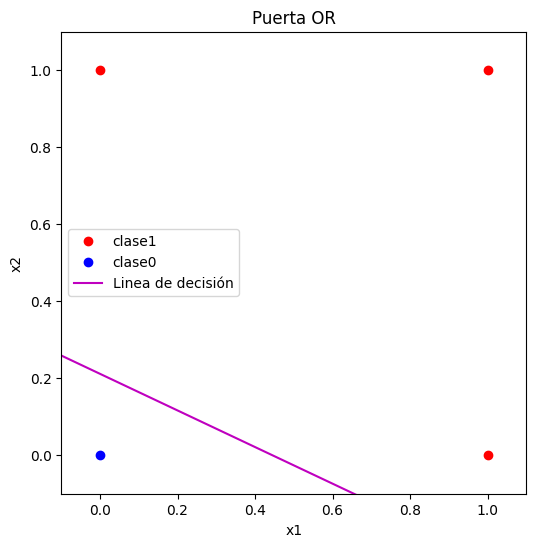

In [5]:
# Funcion OR
data_or = np.array([#[x1,x2, y]
                     [0,0, 0],
                     [0,1, 1],
                     [1,0, 1],
                     [1,1, 1]  # La salida y es 1 cuando alguna entrada es 1
                    ])

labels = np.array([ "Puerta OR",
                   ["x1", "x2"],         # X=[x1, x2]
                   ['clase0','clase1']   # y=[clase0, clase1]
                  ], dtype=object)
###################################

# Creamos un perceptron de 2 entradas
perceptron_or = Perceptron(2)

# lo entrenamos con los valores de la tabla de verdad de una funcion OR
wi = perceptron_or.fit(data_or, verbose=1)
# wi es el historico de pesos, el ultimo wi[-1] son los pesos ajustados 

# Graficamos los puntos y la linea de decision
plot_2D(data_or, wi[-1], labels) 


score: 0.25
score: 0.25
score: 0.25
score: 0.25
score: 0.25
score: 0.25
score: 0.25
score: 0.25
score: 0.25
score: 0.5
score: 0.5
score: 0.75
score: 1.0
Entrenamiento completado en 14 iteraciones

>>> Linea decision:
------------------
 b = -0.34
 w1= 0.25
 w2= 0.25
 m=-0.98, n=1.33


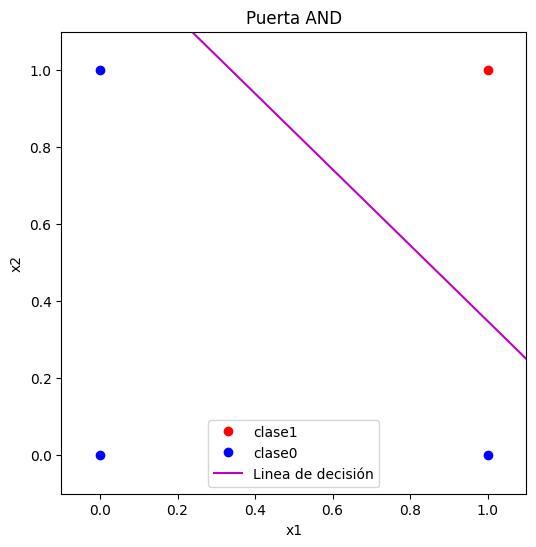

In [6]:
# Funcion AND
data_and = np.array([#[x1,x2, y]
                      [0,0, 0],
                      [0,1, 0],
                      [1,0, 0],
                      [1,1, 1]  # La salida y es 1 cuando todas las entradas son 1
                     ])

labels = np.array([ "Puerta AND",
                   ["x1", "x2"],         # X=[x1, x2]
                   ['clase0','clase1']   # y=[clase0, clase1]
                  ], dtype=object)
###################################

# Creamos un perceptron de 2 entradas
perceptron_and = Perceptron(2)

# lo entrenamos con los valores de la tabla de verdad de una funcion AND
wi = perceptron_and.fit(data_and, verbose=0)
# wi es el historico de pesos, el ultimo wi[-1] son los pesos ajustados 

# Graficamos los puntos y la linea de decision
plot_2D(data_and, wi[-1], labels) 

Epoca: 1 --> errores= 1 --> Conjunto de errores:[0, 1.0, 0, 0]
score: 0.75
Epoca: 2 --> errores= 1 --> Conjunto de errores:[0, 1.0, 0, 0]
score: 0.75
Epoca: 3 --> errores= 1 --> Conjunto de errores:[0, 1.0, 0, 0]
score: 0.75
Epoca: 4 --> errores= 1 --> Conjunto de errores:[0, 1.0, 0, 0]
score: 0.75
Epoca: 5 --> errores= 1 --> Conjunto de errores:[0, 1.0, 0, 0]
score: 0.75
Epoca: 6 --> errores= 1 --> Conjunto de errores:[0, 1.0, 0, 0]
score: 0.75
Epoca: 7 --> errores= 1 --> Conjunto de errores:[0, 1.0, 0, 0]
score: 0.75
Epoca: 8 --> errores= 1 --> Conjunto de errores:[0, 1.0, 0, 0]
score: 0.75
Epoca: 9 --> errores= 1 --> Conjunto de errores:[0, 1.0, 0, 0]
score: 0.75
Epoca: 10 --> errores= 2 --> Conjunto de errores:[0, 1.0, 0, -1.0]
score: 0.75
Epoca: 11 --> errores= 1 --> Conjunto de errores:[0, 1.0, 0, 0]
score: 0.75
Epoca: 12 --> errores= 2 --> Conjunto de errores:[0, 1.0, 0, -1.0]
score: 0.75
Epoca: 13 --> errores= 2 --> Conjunto de errores:[0, 1.0, 0, -1.0]
score: 0.75
Epoca: 14 --

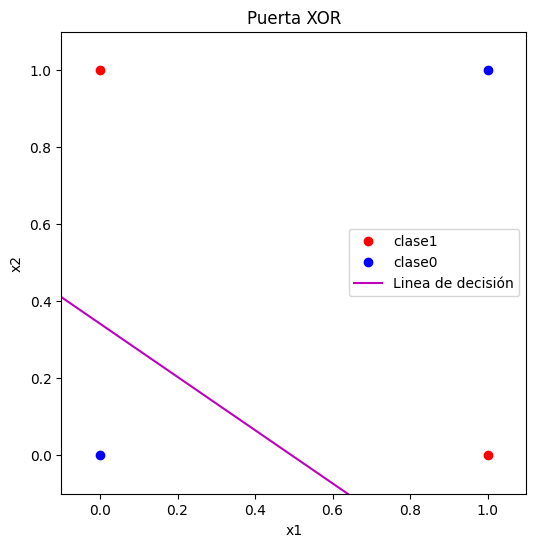

In [7]:
# funcion XOR
data_xor =  np.array([#[x1,x2, y]
                      [0,0, 0],
                      [0,1, 1],
                      [1,0, 1],
                      [1,1, 0]  # La salida es 0 cuando las 2 entradas son iguales
                     ])

labels = np.array([ "Puerta XOR",
                   ["x1", "x2"],         # X=[x1, x2]
                   ['clase0','clase1']   # y=[clase0, clase1]
                  ], dtype=object)
###################################

# Creamos un perceptron de 2 entradas
perceptron_xor = Perceptron(2)

# lo entrenamos con los valores de la tabla de verdad de una funcion XOR
wi = perceptron_xor.fit(data_xor, verbose=1)
# wi es el historico de pesos, el ultimo wi[-1] son los pesos ajustados 

# Graficamos los puntos y la linea de decision
plot_2D(data_xor, wi[-1], labels) 

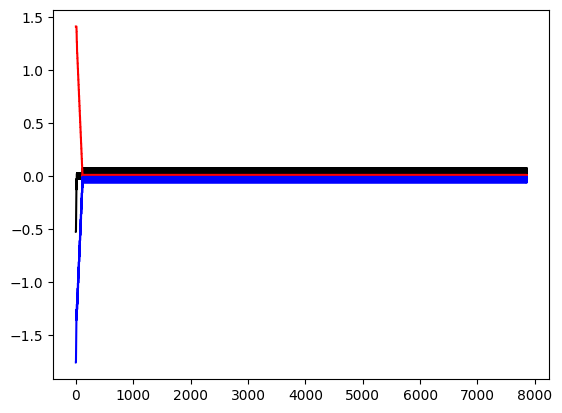

In [8]:
# En este caso graficamos el historico de pesos, para ver que no convergen

plt.plot(wi[:,0], 'k')
plt.plot(wi[:,1], 'r')
plt.plot(wi[:,2], 'b')
plt.show()

# la funcion XOR no es linealmente separable
# Un Perceptron NO PUEDE representar un puerta XOR

##### Ejercicios a completar

In [9]:
# Funcion NAND
input_data = np.array([#[x1,x2, y]
                      [0,0, 1],
                      [0,1, 1],
                      [1,0, 1],
                      [1,1, 0]  # La salida y es 0 si todas las entradas son 1
                     ])

labels = np.array([ "Puerta NAND",
                   ["x1", "x2"],         # X=[x1, x2]
                   ['clase0','clase1']   # y=[clase0, clase1]
                  ], dtype=object)
###################################


In [10]:
# Funcion NOT
input_data = np.array([#[x1,x2, y]
                      [0,0, 1],
                      [0,1, 1],
                      [1,0, 0],
                      [1,1, 0]  # La salida y es la inversa de x1
                     ])

labels = np.array([ "Puerta NOT",
                   ["x1", "x2"],         # X=[x1, x2]
                   ['clase0','clase1']   # y=[clase0, clase1]
                  ], dtype=object)

###################################

#### 3.2  Ejemplo genérico
Usando el perceptron, entrenado con un conjunto de datos dado, obtenemos la recta de decisión que nos permite realizar predicciones.

Partimos de un conjunto de datos 'X' junto a sus clases 'y'

Epoca: 1 --> errores= 7 --> Conjunto de errores:[0, 0, 0, 0, 0, 0, 0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
score: 0.5714
Epoca: 2 --> errores= 3 --> Conjunto de errores:[0, 0, 0, 0, 0, 0, 0, -1.0, 0, -1.0, 0, -1.0, 0, 0]
score: 0.4286
Epoca: 3 --> errores= 5 --> Conjunto de errores:[1.0, 0, 1.0, 0, 0, 0, 0, -1.0, 0, -1.0, 0, 0, -1.0, 0]
score: 0.5
Epoca: 4 --> errores= 5 --> Conjunto de errores:[1.0, 0, 0, 0, 1.0, 0, 0, -1.0, -1.0, 0, 0, -1.0, 0, 0]
score: 0.4286
Epoca: 5 --> errores= 3 --> Conjunto de errores:[1.0, 0, 0, 0, 0, 0, 0, -1.0, 0, 0, 0, 0, 0, -1.0]
score: 0.5
Epoca: 6 --> errores= 2 --> Conjunto de errores:[1.0, 0, 0, 0, 0, 0, 0, -1.0, 0, 0, 0, 0, 0, 0]
score: 0.5
Epoca: 7 --> errores= 3 --> Conjunto de errores:[1.0, 0, 0, 0, 0, 0, 0, -1.0, 0, -1.0, 0, 0, 0, 0]
score: 0.5
Epoca: 8 --> errores= 2 --> Conjunto de errores:[1.0, 0, 0, 0, 0, 0, 0, -1.0, 0, 0, 0, 0, 0, 0]
score: 0.5
Epoca: 9 --> errores= 3 --> Conjunto de errores:[1.0, 0, 0, 0, 0, 0, 0, -1.0, -1.0, 0, 0, 0, 

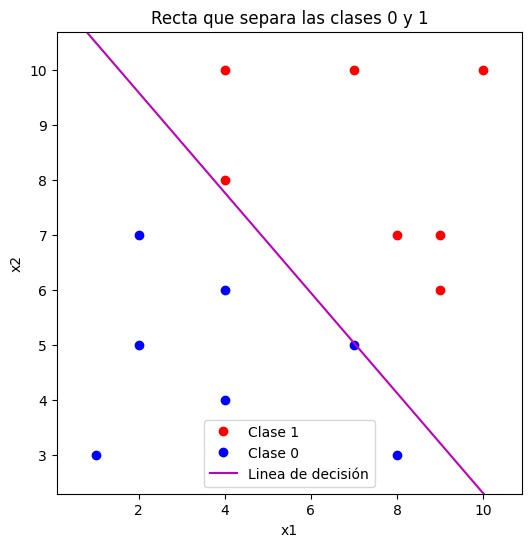

In [11]:
# Ejemplo 3.2 
# conjunto de datos: 14 observaciones -> X=[x1,x2]
X = [
     [8,7], [4,10], [9,7], [7,10], [9,6], [4,8], [10,10],
     [2,7], [8,3],  [7,5], [4,4],  [4,6], [1,3], [2,5]
    ]

# vector de clasificacion y (features)
y = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

# ampliamos el vector de datos (caracteristicas) con el vector de clases (etiquetas)
input_data = np.array(X)
input_data = np.insert(input_data, 2, y, axis=1) 

labels = np.array([ "Recta que separa las clases 0 y 1",
                   ["x1", "x2"],          # X=[x1, x2]
                   ['Clase 0','Clase 1']  # y=[clase0, clase1]
                  ], dtype=object)

###################################

# Creamos un perceptron de 2 entradas
perceptron2 = Perceptron(2)

# lo entrenamos con los datos contenidos en 'input_data'
wi = perceptron2.fit(input_data, verbose=1)
# wi es el historico de pesos, el ultimo wi[-1] son los pesos ajustados 

# Graficamos los puntos y la linea de decision
plot_2D(input_data, wi[-1], labels)

In [12]:
# Score the model
# imprimirá la puntuación de precisión con el conjunto de datos 
#perceptron2.score(X_test, y_test)
perceptron2.score(X, y)


1.0

#### 3.3  Concesión de préstamos a clientes
Una entidad bancaria dispone de los datos de sus clientes (edad y ahorros), a partir de ellos decide si se les conceden préstamos o no.

score: 0.4545
score: 0.5455
score: 1.0
Entrenamiento completado en 4 iteraciones

>>> Linea decision:
------------------
 b = 0.23
 w1= -6.26
 w2= 4.11
 m=1.52, n=-0.06


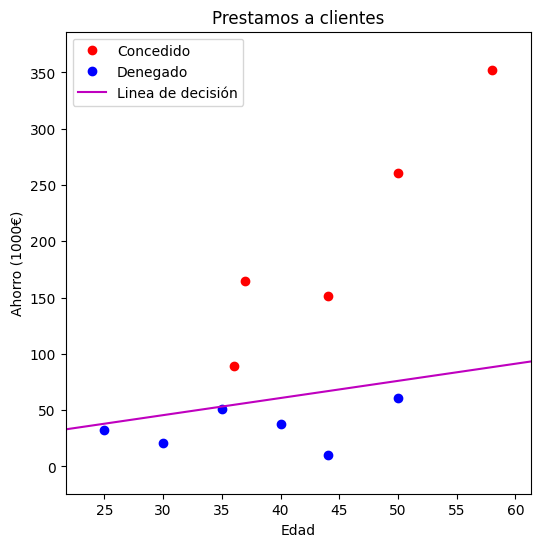

In [13]:
# Ejemplo 3.3
# -----------

# Datos de 10 personas -> [edad, ahorro(1000$)]
personas = np.array([
                     [25, 32], [40, 38], [30, 20.9], [44, 10],[35, 51], [50, 61],
                     [44, 151], [36, 89], [50, 261], [37, 165], [58, 352]
                    ])

# 0 : denegada,    1 : aprobada   
clases = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

input_data = np.array(personas)                        # convertimos a numpy array
input_data = np.insert(input_data, 2, clases, axis=1)  # añade vector de clases -> [x1, x2, y]


labels = np.array([ "Prestamos a clientes",
                   ["Edad", "Ahorro (1000€)"], # x1 , x2
                   ['Denegado','Concedido']    # y_clase0, y_clase1
                  ], dtype=object)

###################################

# Creamos un perceptron de 2 entradas
perceptron3 = Perceptron(2)

# lo entrenamos con los datos contenidos en 'input_data'
wi = perceptron3.fit(input_data, verbose=0)
# wi es el historico de pesos, el ultimo wi[-1] son los pesos ajustados 

# Graficamos los puntos y la linea de decision
plot_2D(input_data, wi[-1], labels)

[2, 5, 2]


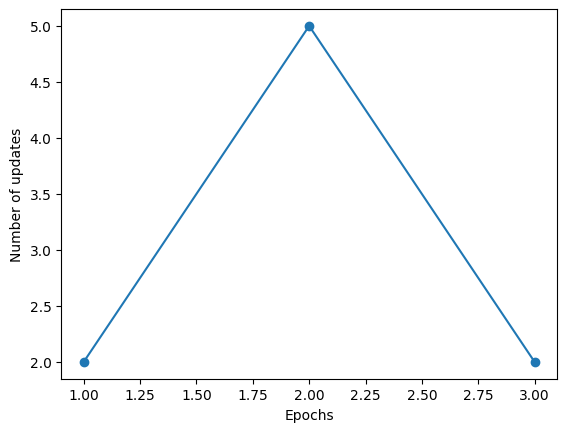

In [14]:
print(perceptron3.errors_)
plt.plot(range(1, len(perceptron3.errors_) + 1), perceptron3.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
 
# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [15]:
### Ejemplo de prediccion

edad = float(input("Introduce tu edad (años): "))
money = float(input("Introduce tu dinero ahorrado (€): "))/1000


if perceptron3.predict([edad,money]) == 1:
    resultado ="Prestamo concedido"
else:
    resultado ="Prestamo no concedido"
    
print("Respuesta de la red neuronal...", resultado)

Introduce tu edad (años): 48
Introduce tu dinero ahorrado (€): 120000
Respuesta de la red neuronal... Prestamo concedido


#### 3.4 Clasificación  de hombres y mujeres por su peso y altura
Disponemos de unos datos de pesos y alturas de hombre y mujeres.
A partir de estos datos podemos realizar predicciones del genero al que pertenece un persona a partir de su peso y altura.

score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.7
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5
score: 0.5

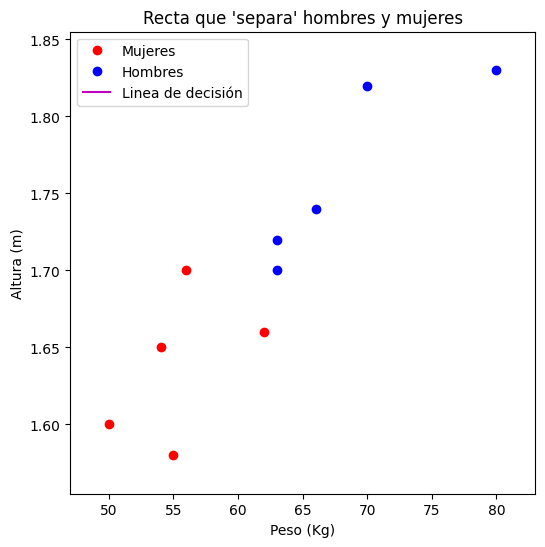

In [16]:
# Ejemplo 3.4
# -----------

# Datos de pesos y alturas de hombres y mujeres
input_data= np.array([[56, 1.70, 1], # Mujer de 1.70m y 56kg
                      [63, 1.72, 0], # Hombre de 1.72m y 63kg
                      [50, 1.60, 1], # Mujer de 1.60m y 50kg
                      [63, 1.70, 0], # Hombre de 1.70m y 63kg
                      [66, 1.74, 0], # Hombre de 1.74m y 66kg
                      [55, 1.58, 1], # Mujer de 1.58m y 55kg
                      [62, 1.66, 1],
                      [80, 1.83, 0], # Hombre de 1.83m y 80kg
                      [70, 1.82, 0], # Hombre de 1.82m y 70kg
                      [54, 1.65, 1]  # Mujer de 1.65m y 54kg
                     ])

labels=np.array([ "Recta que 'separa' hombres y mujeres",
                 ["Peso (Kg)", "Altura (m)"], # x1 y x2
                 ['Hombres','Mujeres']        # y_clase0 =hombre, y_clase1 =mujer
                ], dtype=object)

###################################

# Creamos un perceptron de 2 entradas
perceptron4 = Perceptron(2)

# lo entrenamos con los datos contenidos en 'input_data'
wi = perceptron4.fit(input_data, verbose=0)
# wi es el historico de pesos, el ultimo wi[-1] son los pesos ajustados 

# Graficamos los puntos y la linea de decision
plot_2D(input_data, wi[-1], labels)


Epoca: 1 --> errores= 8 --> Conjunto de errores:[1.0, -1.0, 1.0, -1.0, -1.0, 0, 0, -1.0, -1.0, 1.0]
score: 0.2
Epoca: 2 --> errores= 8 --> Conjunto de errores:[1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 0, -1.0, 0, 1.0]
score: 0.5
Epoca: 3 --> errores= 6 --> Conjunto de errores:[1.0, 0, 1.0, -1.0, 0, 1.0, 0, -1.0, 0, 1.0]
score: 0.5
Epoca: 4 --> errores= 6 --> Conjunto de errores:[1.0, 0, 1.0, -1.0, -1.0, 0, 0, -1.0, 0, 1.0]
score: 0.6
Epoca: 5 --> errores= 5 --> Conjunto de errores:[1.0, 0, 1.0, -1.0, 0, 0, 0, -1.0, 0, 1.0]
score: 0.6
Epoca: 6 --> errores= 5 --> Conjunto de errores:[1.0, 0, 1.0, -1.0, 0, 0, 0, -1.0, 0, 1.0]
score: 0.6
Epoca: 7 --> errores= 5 --> Conjunto de errores:[1.0, 0, 1.0, -1.0, 0, 0, 0, -1.0, 0, 1.0]
score: 0.6
Epoca: 8 --> errores= 5 --> Conjunto de errores:[1.0, 0, 1.0, -1.0, 0, 0, 0, -1.0, 0, 1.0]
score: 0.6
Epoca: 9 --> errores= 5 --> Conjunto de errores:[1.0, 0, 1.0, -1.0, 0, 0, 0, -1.0, 0, 1.0]
score: 0.6
Epoca: 10 --> errores= 5 --> Conjunto de errores:[1.0, 0, 1.

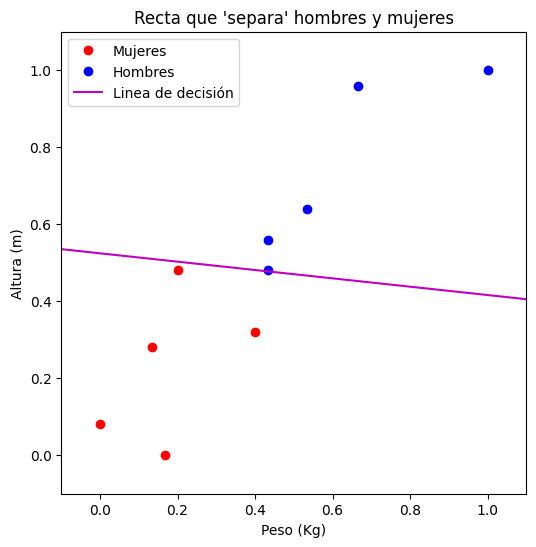

In [17]:
# Ejemplo 3.4 (bis)
# ----------------
'''
En el caso anterior es muy posible que los pesos no hayan convergido,
o si lo hecho haya sido a costa de un gran numero de iteraciones.
Esto se debe a como estan distribuidos los puntos en el espacio x1:x2
Se puede evitar normalizando los datos entre 0 y 1
'''
###################################

# Creamos de nuevo un perceptron de 2 entradas
perceptron4b = Perceptron(2)

# Normalizamos los datos (mejora la convergencia, reduce epochs)
input_data_norm = normaliza(input_data)

# lo entrenamos con los datos contenidos en 'input_data'
wi = perceptron4b.fit(input_data_norm, verbose=1)
# wi es el historico de pesos, el ultimo wi[-1] son los pesos ajustados 

# Graficamos los puntos y la linea de decision
plot_2D(input_data_norm, wi[-1], labels)

In [18]:
### Ejemplo de prediccion (datos normalizados)

peso = float(input("Introduce tu peso (kilogramos): "))
altura = float(input("Introduce tu estatura (centimetros): "))/100

# hay que normalizar los datos de entrada,
# para que tenga la misma escala que los datos de entrenamiento
# OJO, altura y peso deben estar dentro del rango [x_min, x_max]
x_min, x_max= normaliza_lims(input_data)
peso_norm = (peso-x_min[0]) / (x_max[0]-x_min[0])
altura_norm = (altura-x_min[1]) / (x_max[1]-x_min[1])


if perceptron4b.predict([peso_norm, altura_norm]) == 1:
    resultado ="mujer"
else:
    resultado ="hombre"
    
print("La Red Neuronal predice que eres...", resultado)


Introduce tu peso (kilogramos): 72
Introduce tu estatura (centimetros): 1.68
La Red Neuronal predice que eres... mujer
